In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

In [33]:
start = '2010-01-01'
end = '2024-12-31'

df = yf.download('TSLA', start=start, end=end)
df.head()

C:\Users\dkumar0501\AppData\Local\Temp\ipykernel_7260\1436774084.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('TSLA', start=start, end=end)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500


In [34]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2024-12-23,430.600006,434.510010,415.410004,431.000000,72698100
2024-12-24,462.279999,462.779999,435.140015,435.899994,59551800
2024-12-26,454.130005,465.329987,451.019989,465.160004,76366400
2024-12-27,431.660004,450.000000,426.500000,449.519989,82666800
2024-12-30,417.410004,427.000000,415.750000,419.399994,64941000


In [35]:
df = df.reset_index()
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA
0,2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
1,2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2,2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
3,2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
4,2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500


In [36]:
if 'Date' in df.columns:
    df = df.drop(columns=['Date'])
elif 'Price_Date' in df.columns:
    df = df.drop(columns=['Price_Date'])

# Flatten MultiIndex columns if needed
if isinstance(df.columns, pd.MultiIndex):
    df.columns = ['_'.join(col).strip() for col in df.columns]

df.head()

C:\Users\Saurabh\AppData\Local\Temp\ipykernel_7260\1663165118.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(columns=['Date'])


,Close_TSLA,High_TSLA,Low_TSLA,Open_TSLA,Volume_TSLA
0,1.592667,1.666667,1.169333,1.266667,281494500
1,1.588667,2.028000,1.553333,1.719333,257806500
2,1.464000,1.728000,1.351333,1.666667,123282000
3,1.280000,1.540000,1.247333,1.533333,77097000
4,1.074000,1.333333,1.055333,1.333333,103003500


In [39]:
import yfinance as yf
import pandas as pd

# Step 1: Download the data
df = yf.download('TSLA', start='2009-12-31', end='2024-12-31', group_by='ticker')

# Step 2: Flatten column MultiIndex completely
df.columns = df.columns.to_flat_index()
df.columns = [col if isinstance(col, str) else col[-1] for col in df.columns]

# Step 3: Reset index to remove 'Date'
df = df.reset_index()

# Step 4: Drop 'Date' if it exists
if 'Date' in df.columns:
    df = df.drop(columns=['Date'])

# Step 5: Final clean column selection
df = df[['High', 'Low', 'Open', 'Close', 'Volume']]

# Step 6: Display result
df.head()


C:\Users\Saurabh\AppData\Local\Temp\ipykernel_7260\2575913103.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('TSLA', start='2009-12-31', end='2024-12-31', group_by='ticker')
[*********************100%***********************]  1 of 1 completed


,High,Low,Open,Close,Volume
0,1.666667,1.169333,1.266667,1.592667,281494500
1,2.028000,1.553333,1.719333,1.588667,257806500
2,1.728000,1.351333,1.666667,1.464000,123282000
3,1.540000,1.247333,1.533333,1.280000,77097000
4,1.333333,1.055333,1.333333,1.074000,103003500


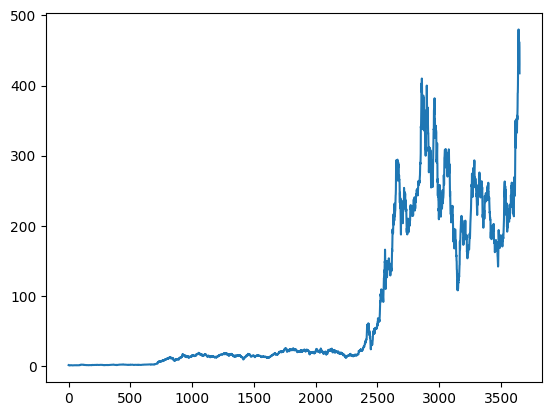

In [40]:
plt.plot(df['Close'])


In [41]:
df

,High,Low,Open,Close,Volume
0,1.666667,1.169333,1.266667,1.592667,281494500
1,2.028000,1.553333,1.719333,1.588667,257806500
2,1.728000,1.351333,1.666667,1.464000,123282000
3,1.540000,1.247333,1.533333,1.280000,77097000
4,1.333333,1.055333,1.333333,1.074000,103003500
...,...,...,...,...,...
3646,434.510010,415.410004,431.000000,430.600006,72698100
3647,462.779999,435.140015,435.899994,462.279999,59551800
3648,465.329987,451.019989,465.160004,454.130005,76366400
3649,450.000000,426.500000,449.519989,431.660004,82666800


In [45]:
ma100 = df['Close'].rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3646    275.067900
3647    277.614000
3648    280.166500
3649    282.476700
3650    284.733201
Name: Close, Length: 3651, dtype: float64

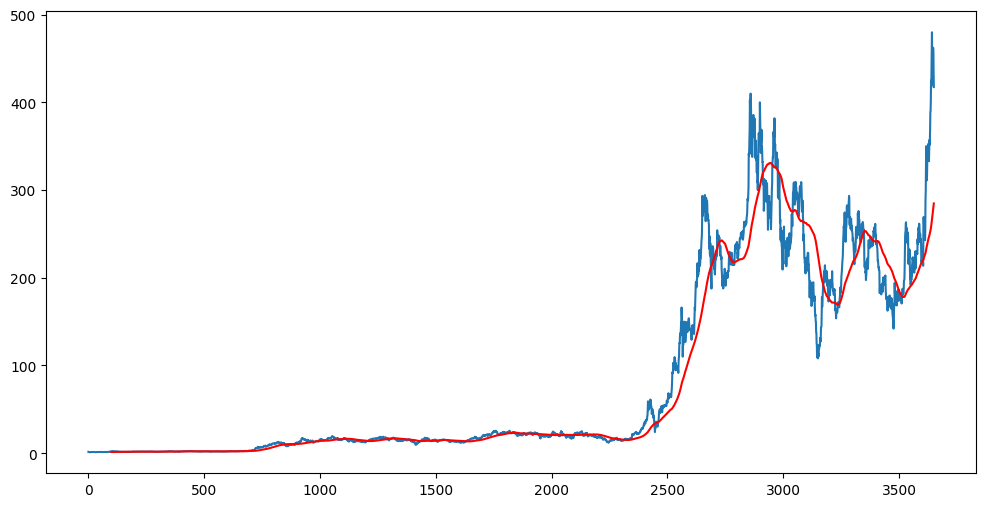

In [49]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [50]:
ma200 = df['Close'].rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3646    232.24500
3647    233.66755
3648    235.05050
3649    236.36140
3650    237.63595
Name: Close, Length: 3651, dtype: float64

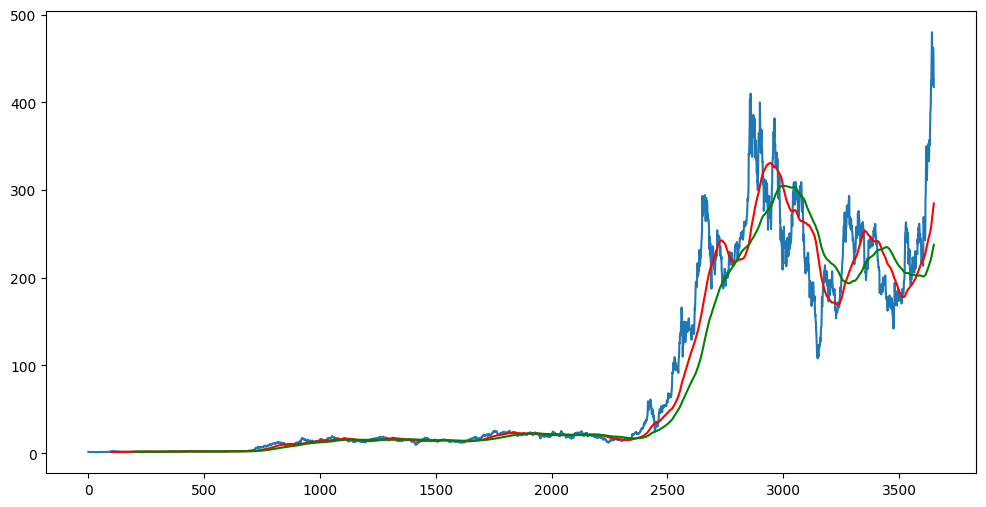

In [51]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [52]:
df.shape


(3651, 5)

In [55]:
# Splitting data into training and testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)


(2555, 1)
(1096, 1)


In [56]:
data_training.head()


,Close
0,1.592667
1,1.588667
2,1.464000
3,1.280000
4,1.074000


In [57]:
data_testing.head()

,Close
2555,136.665329
2556,134.279999
2557,134.889328
2558,143.544662
2559,149.250000


In [61]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [62]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.00407346],
       [0.00404325],
       [0.00310167],
       ...,
       [0.94222642],
       [0.93791634],
       [1.        ]])

In [63]:
data_training_array.shape

(2555, 1)

In [66]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [68]:
x_train.shape

(2455, 100, 1)

In [ ]:
# Ml Moel

In [67]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [72]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Input

model = Sequential()
model.add(Input(shape=(x_train.shape[1], 1)))  # 👈 define input shape here
model.add(LSTM(units=50, activation="relu", return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation="relu", return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation="relu", return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(units=1))


model.summary()

In [73]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [74]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 34s 292ms/step - loss: 0.0087
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 21s 276ms/step - loss: 0.0021
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 287ms/step - loss: 0.0018
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 283ms/step - loss: 0.0010
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 21s 274ms/step - loss: 0.0018
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 283ms/step - loss: 0.0014
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 21s 274ms/step - loss: 0.0014
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 285ms/step - loss: 0.0015
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 21s 276ms/step - loss: 0.0011
Epoch 10/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 279ms/step - loss: 0.0010
Epoch 11/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 21s 272ms/step - loss: 0.0013
Epoch 12/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 21s 272ms/step - loss: 0.0013
Epoch 13/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 21s 275ms/step - loss: 0.0013
Epoch 14/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 21s 272ms/step - loss: 0.0012
Epoch 15/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 21s 

In [77]:
model.save('my_model.keras') 


In [78]:
data_testing.head()

,Close
2555,136.665329
2556,134.279999
2557,134.889328
2558,143.544662
2559,149.250000


In [80]:
past_100_days = data_training.tail(100)

In [84]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [85]:
final_df.head()

,Close
0,34.933334
1,32.104000
2,30.298000
3,32.000668
4,34.416000


In [87]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.01031078],
       [0.00401724],
       [0.        ],
       ...,
       [0.94276656],
       [0.89278457],
       [0.86108705]])

In [88]:
input_data.shape

(1196, 1)

In [89]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])
    

In [90]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1096, 100, 1)
(1096,)


In [92]:
# making predictions

y_predicted = model.predict(x_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 141ms/step


In [93]:
y_predicted.shape

(1096, 1)

In [94]:
y_test

array([0.23660214, 0.23129624, 0.23265163, ..., 0.94276656, 0.89278457,
       0.86108705])

In [95]:
y_predicted

array([[0.18057308],
       [0.19306454],
       [0.20591414],
       ...,
       [0.8062526 ],
       [0.78920496],
       [0.7780286 ]], dtype=float32)

In [96]:
scaler.scale_

array([0.00222439])

In [97]:
scale_factor = 1/0.00222439
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

<function matplotlib.pyplot.show(close=None, block=None)>

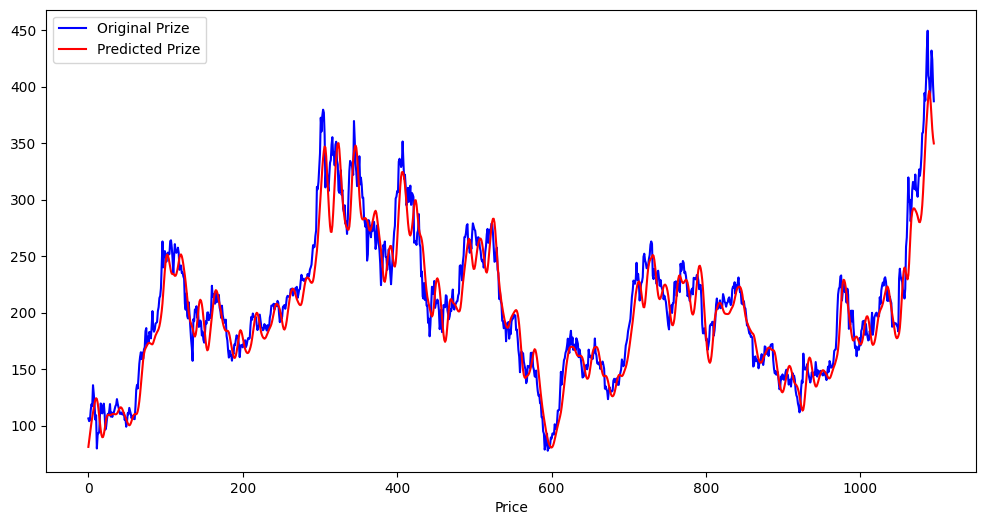

In [98]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Prize')
plt.plot(y_predicted, 'r', label = 'Predicted Prize')
plt.xlabel('Time')
plt.xlabel('Price')
plt.legend()
plt.show